**LASSO = Least Absolute Shrinkage and Selector Operator**

**PREPARING THE DATA**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Read in the dataset
df = pd.read_csv('Advertising.csv')

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Seperate the features and label
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
# create the instance of the polyconverter
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
poly_converter

PolynomialFeatures(include_bias=False)

In [11]:
# create the poly features by fitting and transforming the featueres using the poly converter
poly_features = poly_converter.fit_transform(X)

In [12]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [14]:
#  Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 9), (60, 9), (140,), (60,))

In [17]:
# create an instance of a scaler to avoid mismatch of data
scaler = StandardScaler()

In [18]:
# fit the scaler instance to the train and test features
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
scaled_X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.59023161,
         0.41659155,  1.6137853 ],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  1.4978238 ,
         2.46478013,  2.08205295],
       [-0.84811893, -1.58789957, -1.02319564, ..., -1.05826214,
        -0.90147492, -0.74882387],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -1.03502374,
        -0.73652035, -0.03590138],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.26199091,
        -0.79680416, -0.78714505],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.32216251,
         0.92114819,  0.76625296]])

In [20]:
scaled_X_test

array([[-9.13394717e-01,  1.76259419e+00,  6.81685579e-01,
        -9.63975055e-01,  1.52122095e-02, -2.93048209e-01,
         2.31532893e+00,  1.56001049e+00,  3.69910106e-01],
       [ 1.23121149e+00,  2.36559587e-01, -1.19601922e+00,
         1.38103193e+00,  9.76521639e-01, -6.80562258e-01,
        -5.79325829e-02, -7.40162021e-01, -7.79189389e-01],
       [-4.60024728e-01, -4.07766136e-01,  3.50051150e-01,
        -6.82242743e-01, -5.06457342e-01, -1.10940195e-01,
        -6.39722074e-01, -1.69172158e-01,  3.57554301e-02],
       [-4.96816533e-01,  1.65407618e+00,  9.47927303e-01,
        -7.09383526e-01,  4.86260118e-01,  1.37061544e-01,
         2.10033570e+00,  1.77735495e+00,  6.78908133e-01],
       [-1.42610633e+00,  8.05649381e-02, -1.35015916e+00,
        -1.14433859e+00, -8.66050574e-01, -9.38134722e-01,
        -2.21679679e-01, -8.42466779e-01, -7.93375596e-01],
       [-1.56971305e+00, -5.02719400e-01, -4.11306765e-01,
        -1.16855131e+00, -1.00646472e+00, -8.680574

**CREATE THE MODEL**

In [22]:
# create an instance of a LASSOCV model
model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [23]:
# Fit the model to the scaled X train dataset
model.fit(scaled_X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [24]:
model.alpha_

0.008055973939899815

In [25]:
# predict on the test features
pred = model.predict(scaled_X_test)

In [26]:
pred

array([13.87628528, 19.35550387, 12.24477498, 16.65015716,  8.10143046,
        7.06089346, 20.15647249, 17.47310322, 10.5342835 , 20.08192796,
        9.57896502, 14.08364243, 12.03412927, 23.30395567, 19.63268911,
        9.2321908 , 12.15115371,  9.29344723,  8.5071446 , 21.6137403 ,
        7.19974658, 19.26623551, 27.29093125, 24.61509638,  9.13042581,
       11.75391898, 20.50920042,  9.1564745 , 12.69501597,  8.61505399,
        8.63748252, 20.15875802, 10.90888361,  6.87528275, 18.19721092,
        9.4153843 , 10.31656845,  9.68295713,  7.48941617, 10.99751151,
       12.58834252, 10.57903097, 11.14453412,  7.48220043, 11.39211864,
       10.30759746,  6.3945454 , 15.50069149, 13.29570002, 22.62455777,
       10.3910491 , 13.17238334, 14.30715922, 11.88271631, 11.63482165,
        5.8650508 , 25.04637765,  9.69552461, 17.424648  , 15.68429569])

In [27]:
# obtain the coefficient of the model
model.coef_

array([ 4.0868354 ,  0.23218079,  0.12348967, -2.59304716,  3.7542211 ,
       -0.16783813,  0.        ,  0.12717958, -0.        ])

In [28]:
# evaluate the error
error = y_test - pred

In [29]:
error

37     0.823715
109    0.444496
31    -0.344775
89     0.049843
66     1.398570
119   -0.460893
54     0.043528
74    -0.473103
145   -0.234283
142    0.018072
148    1.321035
112    0.016358
174   -0.534129
55     0.396044
141   -0.432689
149    0.867809
25    -0.151154
34     0.206553
170   -0.107145
39    -0.113740
172    0.400253
153   -0.266236
175   -0.290931
61    -0.415096
65     0.169574
50    -0.353919
42     0.190800
129    0.543526
179   -0.095016
2      0.684946
12     0.562517
133   -0.558758
90     0.291116
22    -1.275283
41    -1.097211
32     0.184616
125    0.283432
196    0.017043
158   -0.189416
180   -0.497512
16    -0.088343
186   -0.279031
144    0.255466
121   -0.482200
80     0.407881
18     0.992403
78    -1.094545
48    -0.700691
4     -0.395700
15    -0.224558
1      0.008951
43    -0.272383
102    0.492841
164    0.017284
9     -1.034822
155   -2.665051
36     0.353622
190    1.104475
33    -0.024648
45    -0.784296
Name: sales, dtype: float64

In [31]:
# Evaluate the error metrics
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [32]:
MAE

0.4747387484223056

In [33]:
MSE

0.4323411131522269

In [34]:
RMSE

0.6575265113683454

In [35]:
# Evaluate to find the optimal degree of the model
train_rmse = []
test_rmse = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)
    model.fit(scaled_X_train, y_train)
    
    train_pred = model.predict(scaled_X_train)
    test_pred = model.predict(scaled_X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    trainrmse = np.sqrt(train_mse)
    testrmse = np.sqrt(test_mse)
    
    train_rmse.append(trainrmse)
    test_rmse.append(testrmse)

In [36]:
train_rmse

[1.7391103781994677,
 0.593168672742689,
 0.5153696476335766,
 0.49493252872564025,
 0.4948139762555465,
 0.5024519619855718,
 0.510318417455935,
 0.501815322080928,
 0.5098339637681596]

In [37]:
test_rmse

[1.542227525236632,
 0.6575265113683454,
 0.6063140748984039,
 0.589236408649863,
 0.5937432334795477,
 0.6028443529819474,
 0.6078013010734932,
 0.6053603540288087,
 0.6107871978806246]

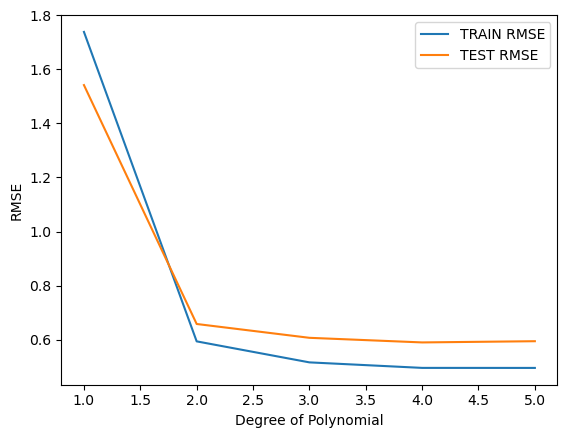

In [38]:
# Visualize the errors
plt.plot(range(1,6), train_rmse[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse[:5], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

**CREATE THE FINAL MODEL**

In [45]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_one = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)
model.fit(scaled_X_train, y_train)

model.coef_

pred = model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)


final_model = model.fit(X,y)

In [46]:
pred

array([14.16203485, 19.2942685 , 12.34178429, 16.97745571,  8.02340978,
        6.95799942, 20.11875833, 17.32880647, 10.43139937, 19.96174466,
        9.56959473, 13.94205676, 11.90851817, 23.35138146, 19.56656277,
        9.27838151, 12.30485359,  9.30152997,  8.56733436, 21.51633564,
        7.06650884, 19.3377222 , 27.28027149, 24.52239173,  9.17172464,
       11.60918126, 20.73841405,  9.29953525, 12.56948515,  8.40051066,
        8.56984613, 20.03587647, 10.83439653,  6.79505173, 18.18820331,
        9.48107219, 10.41803957,  9.70785725,  7.22932328, 10.85467692,
       12.85491418, 10.51648453, 11.26905127,  7.41516944, 11.54705407,
       10.42233031,  6.02782344, 15.36338733, 13.18723611, 22.67619584,
       10.4721906 , 13.01165791, 14.56684361, 11.90062303, 11.47303307,
        5.59404766, 25.06115365,  9.69468957, 17.44771723, 15.60375637])

In [47]:
MAE,MSE,RMSE

(0.43350346185900673, 0.36761675741990735, 0.6063140748984039)

In [48]:
prediction = final_model.predict([[78,54,13.8]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [49]:
prediction

array([16.39461683])